# Homework 3
### Francicso Belliard

In [510]:
# import libraries
require(dplyr)
require(ggplot2)
require(ggalt)
require(cowplot)
require(tibble)
# plotting options
pltTheme = theme(
    axis.text=element_text(size=20),
    axis.title=element_text(size=20),
    legend.title=element_text(size=20),
    legend.text=element_text(size=20),
    plot.title = element_text(size=22))
# plot options
options(repr.plot.width=20)

# attribute vectors
x1 <- c(1,1,1,2,3,3,3,4,5)
x2 <- c(1,2,4,3,0,2,5,4,3)
# class vector
class <- c('pos','neg','neg','pos','pos','pos','neg','neg','neg')

# combine into dataframe
df <- data.frame(x1,x2,class)
# print dataframe
cat("Table\n")
print(df)

Table
  x1 x2 class
1  1  1   pos
2  1  2   neg
3  1  4   neg
4  2  3   pos
5  3  0   pos
6  3  2   pos
7  3  5   neg
8  4  4   neg
9  5  3   neg


### Q2. Use the examples from Table 3.7 to classify object $y = [3,3]$ with the 5-NN classifier.
##### Note that two nearest neighbors are positive and three nearest neighbors are negative. Will weighted 5-NN classifier change anything? To see what is going on, plot the locations of the examples in a graph.

#### Distance Formula
$d_{E}(x,y)=\sqrt{\sum_{i=1}^{n}(x_i - y_i )^{2}}$
#### Weight Formula
$w_i = \begin{cases} \frac{d_k - d_i}{d_k - d_1},d_k \neq d_1\\ \ 1 \ \ \ \ \ ,d_k = d_1 \end{cases}$

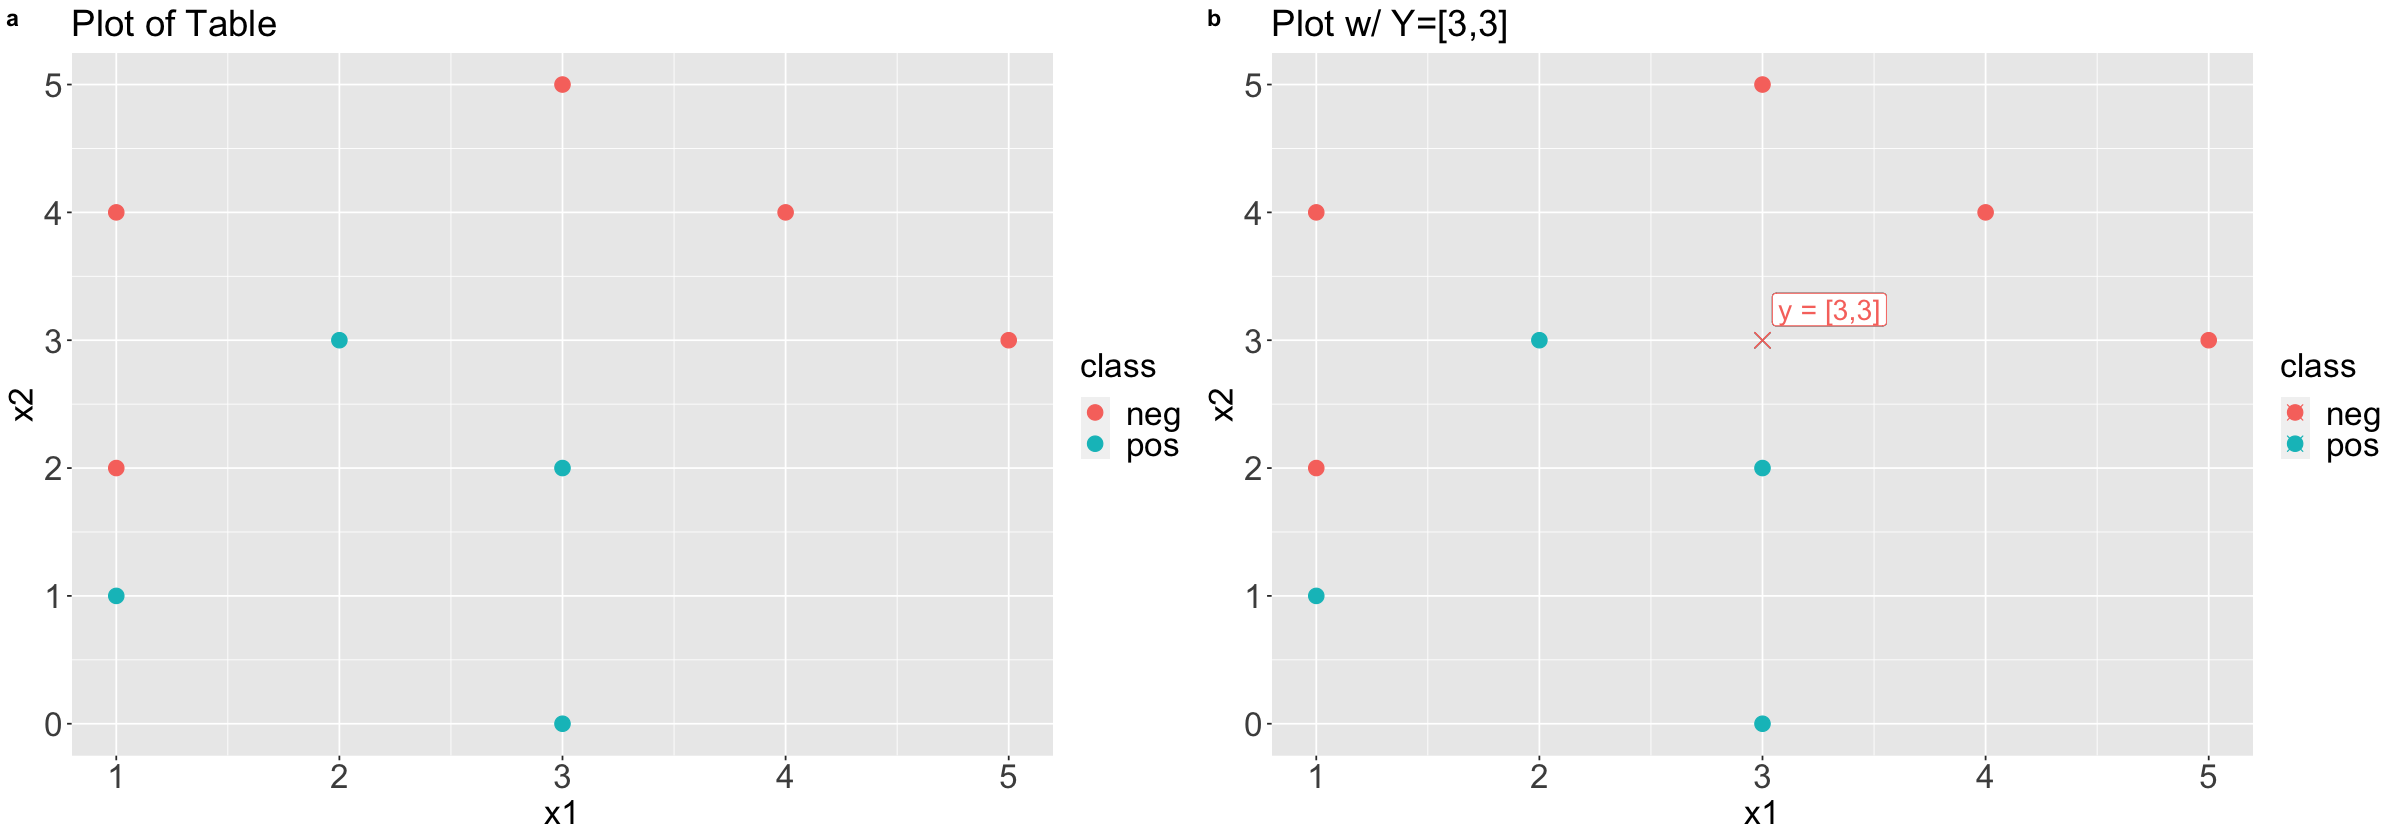

In [542]:
# plot table
# create baseplot
baseplt <- ggplot(df,aes(x1,x2,color=class))+
geom_point(size=4)
# create plot1
plt1 <- baseplt+
# add options to plot1
ggtitle("Plot of Table")+
# add theme
pltTheme
# create plt2 using plot1
plt2 <- baseplt+
ggtitle("Plot w/ Y=[3,3]")+
# add point y=[3,3] to plot2
geom_point(x=3,y=3,shape=4,size=4)+
# label point [3,3]
geom_label(x=3.30,y=3.24,label='y = [3,3]',size = 6,show.legend=FALSE)+
pltTheme
# arrange side by side
plot_grid(plt1,plt2,labels='auto')

#### Compute Distances and Weights

In [569]:
# y vector to classify
y <- c(3,3,'ukn')

# join y to set of all points
all_pts <- rbind(df,y)

# process points and store distances in knn_dist
knn_dist <- all_pts %>%
# select attribute vectors only
select(x1,x2) %>%
# compute euclidian distance
dist %>%
# convert to matrix
as.matrix %>%
# convert to dataframe
as.data.frame %>%
# get last row vector
filter(colnames(.) == nrow(.)) %>%
# sort row vector
sort
# remove first distance (i.e y=[3,3])
knn_dist <- knn_dist[-1]
# process distances and store points in knn_points
knn_points <- knn_dist %>%
# get sorted indices from distance vector
colnames %>%
# convert to numeric
as.numeric
# retrieve and store points using sorted indices
knn_points <- all_pts[knn_points,]
knn_points

# function to compute weights
w <- function(x){ (x[nrow(x)]-x)/(x[nrow(x)]-x[1])}
wt_points <- knn_points %>% 
# calculate weights
add_column(weight_dist = w(t(knn_dist)))

wt_points[1:5,] %>%
# group by class
group_by(class) %>%
# sum weights for each class
summarize(sum(weight_dist),.groups = 'drop')
# convert columns to numeric
knn_points <- knn_points %>% mutate(x1 = as.numeric(x1),
                                    x2 = as.numeric(x2))

,x1,x2,class
,<chr>,<chr>,<chr>
4,2,3,pos
6,3,2,pos
8,4,4,neg
7,3,5,neg
9,5,3,neg
2,1,2,neg
3,1,4,neg
1,1,1,pos
5,3,0,pos


class,sum(weight_dist)
<chr>,<dbl>
neg,1.792893
pos,2.000000


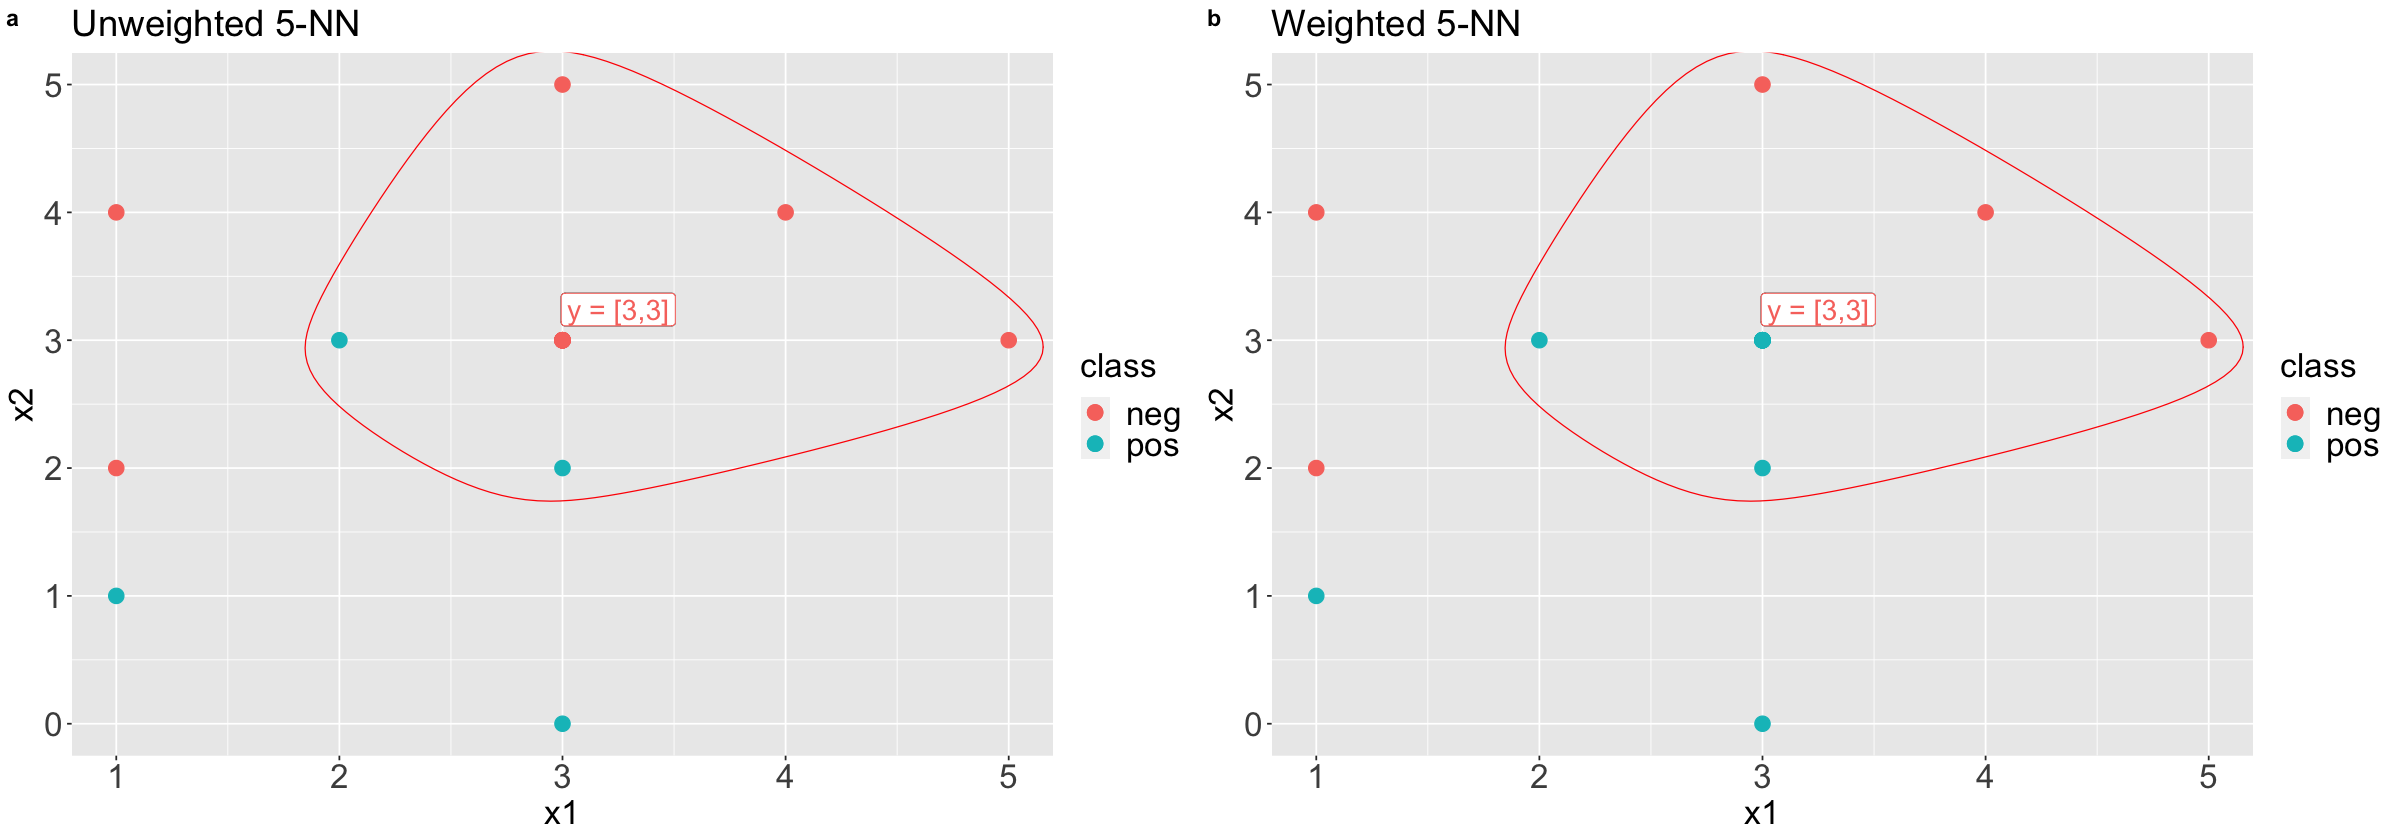

In [605]:
# create plot3 from baseplt
plt3 <- baseplt+
# add point y=[3,3]
geom_point(x=3,y=3,aes(color='neg'),size=4)+
# label point [3,3]
geom_label(x=3.25,y=3.24,label='y = [3,3]',size = 6,show.legend=FALSE)+
# circle 5-NN
geom_encircle(data=knn_points[1:5,],color='red')+
ggtitle("Unweighted 5-NN")+
pltTheme
# create plot4 from baseplot
plt4 <- baseplt+
# add point y=[3,3]
geom_point(x=3,y=3,aes(color='pos'),size=4)+
# label point [3,3]
geom_label(x=3.25,y=3.24,label='y = [3,3]',size = 6,show.legend=FALSE)+
# circle 5-NN
geom_encircle(data=knn_points[1:5,],color='red')+
ggtitle("Weighted 5-NN")+
pltTheme
# plot side by side
plot_grid(plt3,plt4,labels="auto")

##### The weighted 5-NN classifier changes the result of the class to positive due to the effects the weights of the nearest neighbors have on the classifier. Since the weights are calculated using the distance of the nearest neighbors, the closer points have a higher weights (see above) and thus, alter the class.

### Q3. (a) Are there any Tomek links? (b) can you find a consistent subset of the training set by the removal of at least one redudant example?

##### (a) The Tomek links are points: (1,1),(1,2),(1,4),and (2,3).

##### (b) No consistent subsets found